<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#KJW_Final_Project_DS620" data-toc-modified-id="KJW_Final_Project_DS620-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>KJW_Final_Project_DS620</a></span></li><li><span><a href="#Clean-and-Prep-for-Text-Analysis" data-toc-modified-id="Clean-and-Prep-for-Text-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clean and Prep for Text Analysis</a></span></li><li><span><a href="#Credits" data-toc-modified-id="Credits-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Credits</a></span></li></ul></div>

### KJW_Final_Project_DS620

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import nltk
from gensim.utils import lemmatize
from nltk.tokenize import word_tokenize, sent_tokenize

from textnets import Corpus, Textnet
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

from nltk import RegexpTokenizer
from nltk.corpus import stopwords
stop = stopwords.words('english')

from collections import Counter
import string
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
edge_list_1=pd.read_csv('ds620_project_groups.csv',header=0)
edge_list_1

,Student1,Student2
0,Vanita Thompson,Mael Illien
1,Vanita Thompson,Jeremy O'Brien
2,Jeremy O'Brien,Mael Illien
3,Simon Ustoyev,Murat Akyildirim
4,Simon Ustoyev,Elina Azrilyan
5,Simon Ustoyev,Jack Russo
6,Murat Akyildirim,Jack Russo
7,Murat Akyildirim,Elina Azrilyan
8,Elina Azrilyan,Jack Russo
9,Zachary Alexander,Amber Ferger


In [3]:
g_project=nx.Graph()
g_project.add_edges_from(zip(edge_list_1['Student1'], edge_list_1['Student2']), label='project_group')

In [4]:
g_project.nodes()

NodeView(('Vanita Thompson', 'Mael Illien', "Jeremy O'Brien", 'Simon Ustoyev', 'Murat Akyildirim', 'Elina Azrilyan', 'Jack Russo', 'Zachary Alexander', 'Amber Ferger', 'Mikhail Kollontai', 'Subhalaxmi Rout', 'Mia Chen', 'Wei Zhou', 'Habib Khan', 'Priya Shaji', 'Abdellah Ait Elmouden\xa0', 'Vijaya Cherukuri', 'Abdellah Ait Elmouden', 'Sheryl Piechocki', 'Jit Seneviratne', 'Ken Popkin', 'Jagdish Chhabria', 'Willie Smalls'))

In [5]:
g_project.add_node('Steven Ellingson')

In [6]:
g_project.nodes()

NodeView(('Vanita Thompson', 'Mael Illien', "Jeremy O'Brien", 'Simon Ustoyev', 'Murat Akyildirim', 'Elina Azrilyan', 'Jack Russo', 'Zachary Alexander', 'Amber Ferger', 'Mikhail Kollontai', 'Subhalaxmi Rout', 'Mia Chen', 'Wei Zhou', 'Habib Khan', 'Priya Shaji', 'Abdellah Ait Elmouden\xa0', 'Vijaya Cherukuri', 'Abdellah Ait Elmouden', 'Sheryl Piechocki', 'Jit Seneviratne', 'Ken Popkin', 'Jagdish Chhabria', 'Willie Smalls', 'Steven Ellingson'))

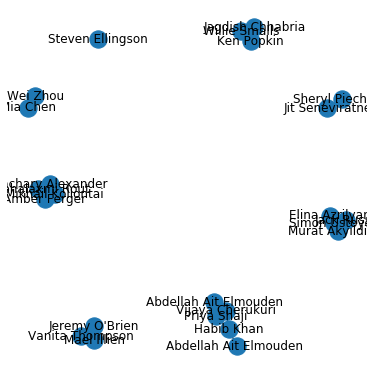

In [7]:
plt.figure(figsize=(5,5))
nx.draw(g_project, with_labels=1)
#nx.draw_random(g, with_labels=1)  

In [8]:
discussion_df=pd.read_csv("DS620_Discussion_Board_Data.csv")

In [9]:
#discussion_df.head()
discussion_df.iloc[1,:]

Thread_Name                                                       Google Ads
Initial_Post_or_Comment                                                    2
Author                                                     Zachary Alexander
Response_To                                                  Vanita Thompson
Thread_Content             Hi Vanita -- I definitely agree that Google Ad...
Name: 1, dtype: object

In [10]:
len(discussion_df)
discussion_df.shape

(181, 5)

In [11]:
#discussion_df_new=discussion_df[discussion_df.Author!=discussion_df.Response_To]
discussion_df_new=discussion_df[discussion_df.Initial_Post_or_Comment==2]

In [12]:
discussion_df_new.shape

(98, 5)

In [13]:
edge_list_2=discussion_df_new.iloc[:,2:4]

In [14]:
edge_list_2.columns = ["Node1","Node2"]
edge_list_2.shape

(98, 2)

In [15]:
edge_list_2

,Node1,Node2
1,Zachary Alexander,Vanita Thompson
3,Abdellah Ait Elmouden,Vijaya Cherukuri
4,Murat Akyildirim,Vijaya Cherukuri
5,Jeremy O'Brien,Vijaya Cherukuri
7,Ken Popkin,Priya Shaji
8,Priya Shaji,Ken Popkin
10,Elina Azrilyan,Mikhail Kollontai
11,Sheryl Piechocki,Mikhail Kollontai
13,Jagdish Chhabria,Abdellah Ait Elmouden
15,Priya Shaji,Ken Popkin


In [16]:
edge_list_new=pd.DataFrame(edge_list_2.groupby(["Node1","Node2"]).size().reset_index(name = "Weight"))
edge_list_new

,Node1,Node2,Weight
0,Abdellah Ait Elmouden,Mikhail Kollontai,1
1,Abdellah Ait Elmouden,Subhalaxmi Rout,1
2,Abdellah Ait Elmouden,Vijaya Cherukuri,2
3,Amber Ferger,Abdellah Ait Elmouden,1
4,Amber Ferger,Jack Russo,1
5,Amber Ferger,Mael Illien,1
6,Amber Ferger,Steven Ellingson,1
7,Amber Ferger,Vanita Thompson,1
8,Elina Azrilyan,Jack Russo,1
9,Elina Azrilyan,Mikhail Kollontai,1


In [17]:
len(edge_list_new)

86

In [18]:
##edge_list_temp.Weight=discussion_df_new.groupby(["Author","Response_To"])['Thread_Content'].count().reset_index()

In [19]:
g_discussion=nx.Graph()
g_discussion.add_weighted_edges_from(zip(edge_list_new['Node1'], edge_list_new['Node2'], edge_list_new['Weight']),label='discussion_comments')

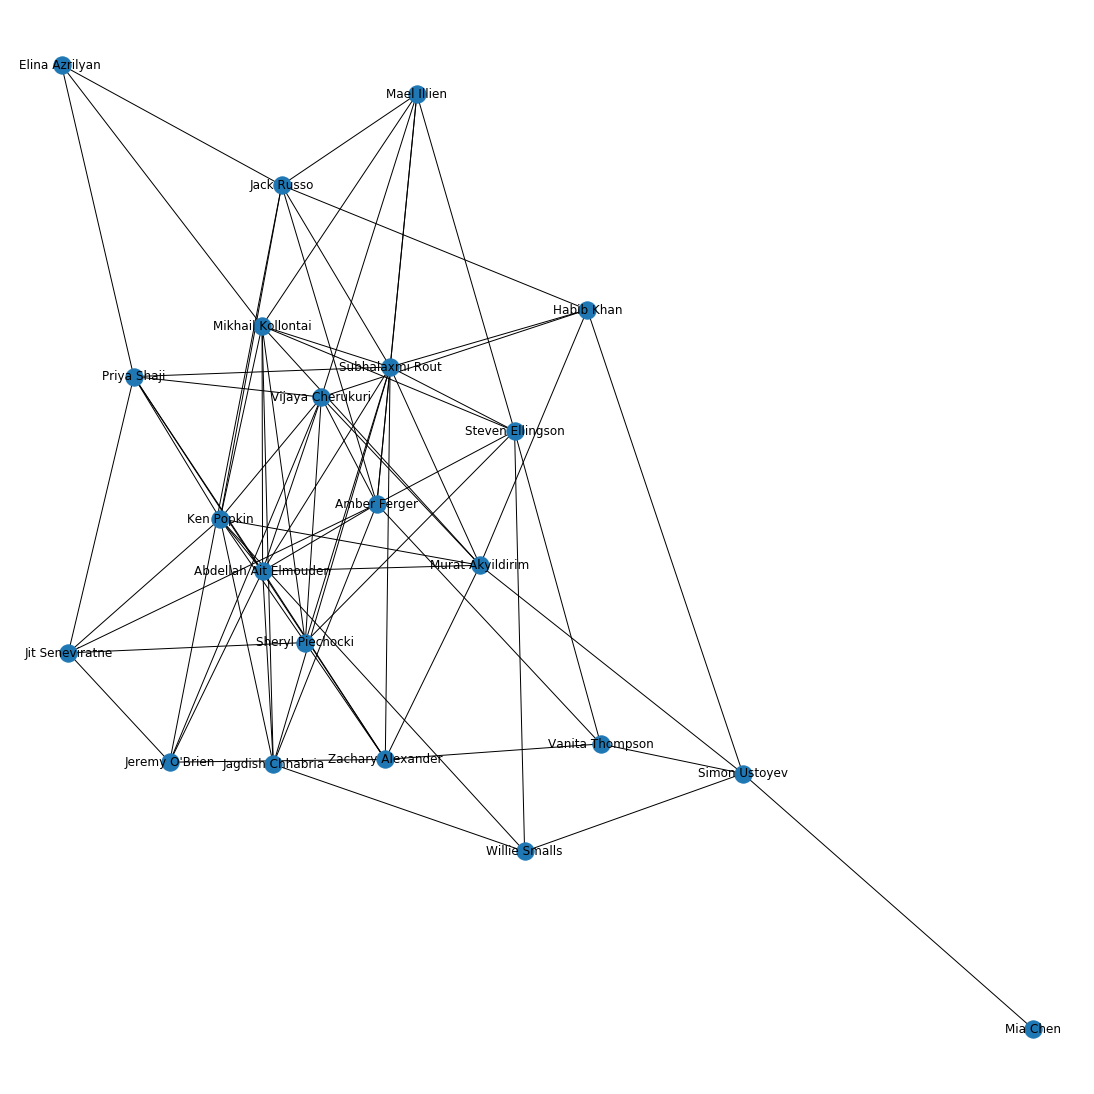

In [20]:
plt.figure(figsize=(15,15))
nx.draw(g_discussion, with_labels=1)

In [21]:
g_discussion.edges(data='weight')

EdgeDataView([('Abdellah Ait Elmouden', 'Mikhail Kollontai', 1), ('Abdellah Ait Elmouden', 'Subhalaxmi Rout', 1), ('Abdellah Ait Elmouden', 'Vijaya Cherukuri', 2), ('Abdellah Ait Elmouden', 'Amber Ferger', 1), ('Abdellah Ait Elmouden', 'Jagdish Chhabria', 1), ('Abdellah Ait Elmouden', "Jeremy O'Brien", 1), ('Abdellah Ait Elmouden', 'Ken Popkin', 2), ('Abdellah Ait Elmouden', 'Murat Akyildirim', 1), ('Abdellah Ait Elmouden', 'Priya Shaji', 1), ('Abdellah Ait Elmouden', 'Zachary Alexander', 1), ('Mikhail Kollontai', 'Elina Azrilyan\xa0', 1), ('Mikhail Kollontai', 'Jagdish Chhabria', 1), ('Mikhail Kollontai', 'Mael Illien', 1), ('Mikhail Kollontai', 'Ken Popkin', 3), ('Mikhail Kollontai', 'Murat Akyildirim', 1), ('Mikhail Kollontai', 'Steven Ellingson', 1), ('Mikhail Kollontai', 'Sheryl Piechocki', 1), ('Mikhail Kollontai', 'Subhalaxmi Rout', 1), ('Subhalaxmi Rout', 'Habib Khan', 1), ('Subhalaxmi Rout', 'Jack Russo', 1), ('Subhalaxmi Rout', 'Jagdish Chhabria', 1), ('Subhalaxmi Rout', 'Mae

In [22]:
g_discussion.neighbors('Jagdish Chhabria')

In [23]:
#discussion_df.Combined=discussion_df.Thread_Name+" "+discussion_df.Thread_Content
discussion_df['Combined'] = discussion_df[['Thread_Name', 'Thread_Content']].apply(lambda x: ' '.join(x), axis=1)

In [24]:
discussion_df.Combined[2]

'Marketing Analytics in Healthcare Marketing Analytics in Healthcare is used for Inbound and Outbound Marketing Metrics. This will help them in Building a Plan, Track results.\r\n\r\nThe business of healthcare is ruled by numbers – revenue, reimbursement and patient volumes .\r\n\r\nThese are some main KPI which will help them in driving the business.\r\n\r\n1) Assist patients and families in navigating health care so they can make more informed decisions and access the care they need and deserve.\r\n\r\n2) Grow referrals and admissions across the system.\r\n\r\n3) Leverage cost efficiencies to increase ROI.\r\n\r\n4) Increase qualified calls to the contact center.'

In [25]:
discussion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Thread_Name              181 non-null    object
 1   Initial_Post_or_Comment  181 non-null    int64 
 2   Author                   181 non-null    object
 3   Response_To              181 non-null    object
 4   Thread_Content           181 non-null    object
 5   Combined                 181 non-null    object
dtypes: int64(1), object(5)
memory usage: 8.6+ KB


In [26]:
discussion_df.head(2)

,Thread_Name,Initial_Post_or_Comment,Author,Response_To,Thread_Content,Combined
0,Google Ads,1,Vanita Thompson,Vanita Thompson,Google Ads provides analytic reporting on how ...,Google Ads Google Ads provides analytic report...
1,Google Ads,2,Zachary Alexander,Vanita Thompson,Hi Vanita -- I definitely agree that Google Ad...,Google Ads Hi Vanita -- I definitely agree tha...


In [27]:
discussion_text=discussion_df.iloc[:,[2,5]]

In [28]:
#discussion_text.head()
len(discussion_text)

181

In [29]:
#discussion_text[discussion_text.Author=='Jagdish Chhabria']
len(str(discussion_text[discussion_text.Author=='Jagdish Chhabria'].Combined))

599

In [30]:
#discussion_text_new = pd.DataFrame(discussion_text.groupby('Author').agg({'Combined':lambda x: ', '.join(x)}))
discussion_text_new = pd.DataFrame(discussion_text.groupby('Author').agg({'Combined':lambda x: ', '.join(x)}).reset_index())

In [31]:
pd.set_option('display.max_colwidth', -1)

In [32]:
len(discussion_text_new)

22

In [33]:
len(str(discussion_text_new[discussion_text_new.Author=='Jagdish Chhabria'].Combined))
#discussion_text_new.head()

7417

In [34]:
discussion_text_new.Combined[0]

'Marketing Analytics in Healthcare Right. Data Analytics in the healthcare industry is changing the way patients and doctors handle care. The more data analytics involved, the more efficient healthcare can be., General Electric GE use marketing analytics to track country of origin for their site users. This can provide GE with a rich insight into where market demands are arising and how to better cater their web pages to different languages and cultures. GM also is implementing a site analytics tool across its dealer network. The tool uses Esri ArcGIS technology to combine US Census tract data with demographic-based consumer profiles, available through the ArcGIS platform.\r\n\r\nReference : https://www.esri.com/en-us/arcgis/products/spatial-analytics-data-science/gm, Hiring decisions by companies using text mining As technological advances accelerate and compound they might eliminate jobs.  As an example for  over  two  decades  information  retrieval  systems have  been  used  by  hu

In [35]:
tokens=pd.Series(str(list()))
for i in range(len(discussion_text_new)):
#    sentences = nltk.sent_tokenize(discussion_text_new.Combined[i])
#    sentences = [nltk.word_tokenize(sent) for sent in sentences
    tokens[i]=nltk.word_tokenize(discussion_text_new.Combined[i])
discussion_text_new["Tokens"]=tokens

#type(tokens)
#len(tokens)
#tokens[-10:-1]

In [36]:
discussion_text_new["Tokens"][5]

['General',
 'Electric',
 'That',
 "'s",
 'interesting',
 ',',
 'Abdellah',
 '.',
 'Using',
 'Census',
 'Data',
 'long',
 'with',
 'geo-location',
 'tracking',
 'seems',
 'pretty',
 'sophisticated',
 '.',
 'I',
 "'m",
 'new',
 'to',
 'this',
 'so',
 'not',
 'sure',
 'if',
 'this',
 'is',
 'common',
 'practice',
 'by',
 'now',
 '.',
 'But',
 'it',
 'sounds',
 'like',
 'it',
 "'s",
 'aimed',
 'at',
 'giving',
 'dealers',
 'an',
 'insight',
 'into',
 'the',
 'potential',
 'customer',
 "'s",
 'demographics',
 'and',
 'either',
 'make',
 'targeted',
 'marketing',
 'efforts',
 'or',
 'know',
 'more',
 'about',
 'their',
 'needs',
 'even',
 'before',
 'when',
 'they',
 'walk',
 'into',
 'the',
 'dealer',
 "'s",
 'center.',
 ',',
 'Harlem',
 'Coffee',
 'Company',
 'It',
 "'s",
 'interesting',
 'that',
 'even',
 'single',
 'channel',
 'businesses',
 'like',
 'Harlem',
 'Coffee',
 'Company',
 'are',
 'so',
 'media-savvy',
 'and',
 'using',
 'different',
 'tools',
 'to',
 'market',
 'their',
 'pr

In [37]:
#text = nltk.Text(discussion_text_new["Tokens"][5])
#words = [w.lower() for w in discussion_text_new["Tokens"][i]]
# type(words)
#vocab = sorted(set(words))
#sentences = nltk.sent_tokenize(document)
#sentences = [nltk.word_tokenize(sent) for sent in sentences]

### Clean and Prep for Text Analysis

In [38]:
#This dataframe has a row for each class member (author) that wrote at least one discussion post, or commented on an 
#existing post. There is one row per author, so an author who wrote 10 discussions and 10 replies has a single row
#that combines all their writing.

discussion_text_new.head(1)

Author  \
0  Abdellah Ait Elmouden   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [39]:
#Create a base metrics dataframe that captures some basic statistics (number of words, number of characters, average
#word length, and number of stopwords) about each author's posts
def avg_word_length(combined):
    words = combined.split()
    avg = sum(len(word) for word in words)/len(words)
    return avg

def stop_words_count(combined):
    count = 0
    words = combined.split()
    stop_words = stopwords.words('english')
    
    for w in words:
        if w in stop_words:
            count = count + 1
    
    return count

base_metrics = discussion_text_new

base_metrics = base_metrics.drop(['Combined','Tokens'], axis=1)

base_metrics['num_words'] = discussion_text_new.Combined.apply(lambda x: len(str(x).split(' ')))

base_metrics['num_chars'] = discussion_text_new.Combined.str.len()

base_metrics['avg_word_length'] = discussion_text_new.Combined.apply(lambda x: avg_word_length(x)) 

stop_words = stopwords.words('english')
base_metrics['stop_words_count'] = discussion_text_new.Combined.apply(lambda x: stop_words_count(x))

base_metrics = base_metrics.sort_values(['num_words'], ascending=False).reset_index(drop=True) 

print('Metrics for each author, sorted in descending order by number of words')
base_metrics.head()

Metrics for each author, sorted in descending order by number of words


,Author,num_words,num_chars,avg_word_length,stop_words_count
0,Amber Ferger,1989,12660,5.312625,766
1,Murat Akyildirim,1717,11369,5.476522,572
2,Zachary Alexander,1585,9981,5.244668,635
3,Simon Ustoyev,1223,7813,5.436303,473
4,Ken Popkin,1218,7328,4.979373,452


In [40]:
#Identify the most frequently occurring words across all the authors posts
everyones_text = ''
for text in discussion_text_new.Combined:
    everyones_text = everyones_text + ' ' + text.lower()

words = everyones_text.split()
words = Counter(words)
common_words = words.most_common(18)
common_words = [entries[0] for entries in common_words]
print(common_words)

['the', 'to', 'and', 'of', 'a', 'in', 'is', 'that', 'for', 'on', 'are', 'be', 'with', 'i', 'this', 'as', 'can', 'it']


In [41]:
#Functions used below to clean data
def remove_stop_words(inclean):
    stop_words = stopwords.words('english')
    words = inclean.split()
    outclean = ''
    
    for word in words:
        if word not in stop_words:
            outclean = outclean + ' ' + word
    
    return outclean
    
def remove_common_words(inclean):
    words = inclean.split()
    outclean = ''
    
    for word in words:
        if word not in common_words:
            outclean = outclean + ' ' + word
    
    return outclean

def remove_url(inclean):
    outclean = re.sub(r"http\S+", "", inclean) 
    
    return outclean

In [42]:
#Run each author's text thru the cleaning steps below, then add the cleaned data as a new column (combined_clean) to the
#discussion_new_text dataframe.
cleandf = discussion_text_new
cleandf = cleandf.drop('Tokens', 1)

clean_data_list = []
word_token_list = []
sentence_token_list = []

for text in cleandf.Combined:
    clean = text.lower()     #lower case
    
    clean = remove_stop_words(clean) #remove stop words
    
    clean = remove_common_words(clean) #remove the most common words
    
    clean = remove_url(clean)
    
    clean_data_list.append(clean)
    
    #remove punctuation and tokenize by word
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(clean)
    word_token_list.append(word_tokens)
    
    #remove punctuation and tokenize by sentence
    translator = str.maketrans('', '', string.punctuation)
    sentence_tokens = sent_tokenize(clean)
    sentence_tokens = [s.translate(translator) for s in sentence_tokens] 
    sentence_token_list.append(sentence_tokens)
    
cleandf['combined_clean'] = clean_data_list
cleandf['word_tokens'] = word_token_list
cleandf['sentence_tokens'] = sentence_token_list

In [43]:
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Author           22 non-null     object
 1   Combined         22 non-null     object
 2   combined_clean   22 non-null     object
 3   word_tokens      22 non-null     object
 4   sentence_tokens  22 non-null     object
dtypes: object(5)
memory usage: 1008.0+ bytes


In [44]:
cleandf.head(1)

Author  \
0  Abdellah Ait Elmouden   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [45]:
cleandf.to_csv('cleaned_file_for_text_analysis.csv', index=False)

3)	Based on lexical similarity between the initial posts and comments thereon. For determining the lexical similarity, we propose to use Natural Language Processing (NLP). We are considering modelling this as a text network and using the textnet library. We’re also considering using NLTK and Gensim libraries for this, and calculating cosine similarity between the discussion threads.

### Credits

1. We used this article from Analytics Vidyha titled [Ultimate Guide to Deal with Text Data](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/) to identify... <br>
a. base metrics to describe the data <br>
b. cleaning recommendations to ensure our data is in a ready state for similarity analysis.
<br><br>
2. This article, [What is Text Similarity in NLP,](https://rxnlp.com/what-is-text-similarity-nlp/#.XxDDZihKg2w) proved helpful for understanding lexical similarity and it's application.
<br><br>
3. This [StackOverflow link](https://stackoverflow.com/questions/24399820/expression-to-remove-url-links-from-twitter-tweet/24399874) enabled a simple regex means to remove URL's.